In [2]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [3]:
def load_data(filename):
    data = np.loadtxt(filename, delimiter=',')
    X = data[:, :2]
    y = data[:, 2]
    return X, y

def map_feature(X1, X2):
    """
    Feature mapping function to polynomial features
    """
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    degree = 6
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)


def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    positive = y == 1
    negative = y == 0
    
    # Plot examples
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)

In [4]:
# load dataset
X_train, y_train = load_data("data/ex2data1.txt")

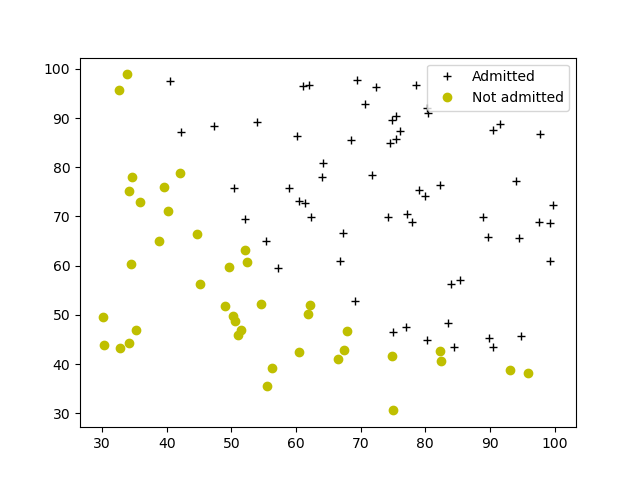

In [5]:
# Plot examples
plt.close('all')
fig, ax = plt.subplots()
plot_data(X_train, y_train[:], pos_label="Admitted", neg_label="Not admitted")
plt.legend(loc="upper right")
plt.show()

In [6]:
def plot_decision_boundary(w, b, X, y):
    # Credit to dibgerge on Github for this plotting code
     
    plot_data(X[:, 0:2], y)
    
    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
        
        plt.plot(plot_x, plot_y, c="b")
        
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        
        z = np.zeros((len(u), len(v)))

        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i, j] = sigmoid(np.dot(map_feature(u[i], v[j]), w) + b)
        
        # important to transpose z before calling contour
        z = z.T
        
        # Plot z = 0
        plt.contour(u, v, z, levels=[0.5], colors="g")

In [75]:
epsilon = np.finfo('double').eps


def sigmoid(z):
    z = np.clip(z, -500, 500) # protect against overflow
    g = 1.0/(1.0+np.exp(-z))

    return g


def f_x(w, b, x):
    return sigmoid(np.dot(x, w) + b)


def compute_cost(w, b, x, y):
    m, n = x.shape
    sum_cost = 0
    for i in range(m):
        y_hat = f_x(w, b, x[i])
        if y_hat < epsilon:
            y_hat = epsilon
        if 1 - y_hat < epsilon:
            y_hat = 1 - epsilon
        sum_cost += (-y[i] * np.log(y_hat) - (1 - y[i]) * np.log(1 - y_hat))
    return sum_cost / m


def gradient_descent(a, w, b, x, y):
    m, n = x.shape
    sum_dw = np.zeros((n,))
    sum_db = 0.
    
    w_in = copy.deepcopy(w)
    b_in = b
    
    for i in range(m):
        err_i = f_x(w, b, x[i]) - y[i]
        sum_dw += err_i * x[i]
        sum_db += err_i
    
    return w_in - a * sum_dw / m, b_in - a * sum_db / m

In [76]:
num_iters = 1000
np.random.seed(1)
w = 0.01 * (np.random.rand(2) - 0.5)
b = -8
alpha = 0.001

for i in range(num_iters):
    w, b = gradient_descent(alpha, w, b, X_train, y_train)   
        
    if i % (num_iters/10) == 0 or i == (num_iters -1):
        cost = compute_cost(w, b, X_train, y_train)
        print(f"Iteration={i}, cost={cost}")


Iteration=0, cost=0.9637901832137504
Iteration=100, cost=0.3054231808276893
Iteration=200, cost=0.3053860974953493
Iteration=300, cost=0.30534904023833864
Iteration=400, cost=0.3053120075716945
Iteration=500, cost=0.3052749994706856
Iteration=600, cost=0.30523801591061395
Iteration=700, cost=0.30520105686681587
Iteration=800, cost=0.30516412231465984
Iteration=900, cost=0.30512721222954814
Iteration=999, cost=0.30509069532243205


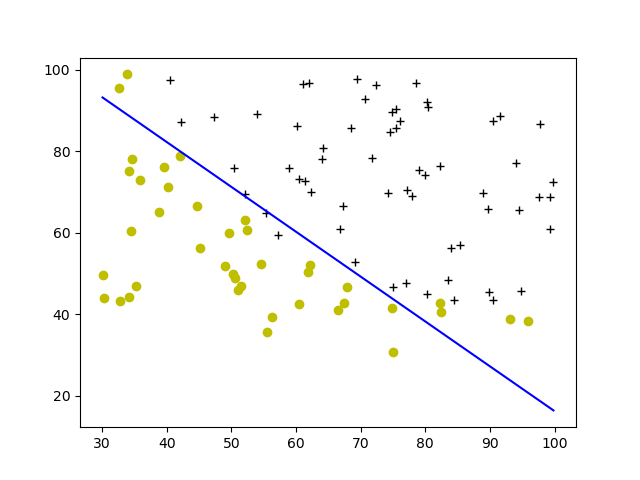

In [77]:
fig, ax = plt.subplots()
plot_decision_boundary(w, b, X_train, y_train)